In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("../data/consum_total_agregat.csv")
display(df.head())

/var/folders/75/d19stbkx517flmxxrmxng2lc0000gn/T/ipykernel_15061/455216069.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/consum_total_agregat.csv")


,Secció censal/Sección censal/Census section,Districte/Distrito/District,Municipi/Municipio/Municipality,Data/Fecha/Date,Ús/Uso/Use,Nombre de comptadors/Número de contadores/Number of meters,Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)
0,801901001,1,BARCELONA,2023-01-01,Comercial/Comercial/Commercial,64,14258
1,801901001,1,BARCELONA,2023-01-01,Domèstic/Doméstico/Domestic,395,11089
2,801901001,1,BARCELONA,2023-01-01,Industrial/Industrial/Industrial,20,490360
3,801901001,1,BARCELONA,2023-01-02,Comercial/Comercial/Commercial,64,6780
4,801901001,1,BARCELONA,2023-01-02,Domèstic/Doméstico/Domestic,395,11571


In [3]:
# RENAME COLUMNS
df.columns = [
    "CensusSection", "District", "Municipality", "Date",
    "Use", "NumMeters", "Consumption_L_day"
]

display(df.head())

,CensusSection,District,Municipality,Date,Use,NumMeters,Consumption_L_day
0,801901001,1,BARCELONA,2023-01-01,Comercial/Comercial/Commercial,64,14258
1,801901001,1,BARCELONA,2023-01-01,Domèstic/Doméstico/Domestic,395,11089
2,801901001,1,BARCELONA,2023-01-01,Industrial/Industrial/Industrial,20,490360
3,801901001,1,BARCELONA,2023-01-02,Comercial/Comercial/Commercial,64,6780
4,801901001,1,BARCELONA,2023-01-02,Domèstic/Doméstico/Domestic,395,11571


In [4]:
print(df.shape)
# There are 963419 rows and 7 columns in the dataset.

# NUMBER OF DUPLICATE ROWS
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

(963419, 7)
Number of duplicate rows: 0


## Data Discovery

In [5]:
# CHECKING DATA TYPES AND NON-NULL COUNTS
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963419 entries, 0 to 963418
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   CensusSection      962324 non-null  object
 1   District           962324 non-null  object
 2   Municipality       963419 non-null  object
 3   Date               963419 non-null  object
 4   Use                963419 non-null  object
 5   NumMeters          963419 non-null  int64 
 6   Consumption_L_day  963419 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 51.5+ MB


None

In [6]:
# SUMMARY STATISTICS
print("\nDescriptive statistics:")
display(df.describe())
print("\nUnique values per column:")
display(df.nunique())


Descriptive statistics:


,NumMeters,Consumption_L_day
count,963419.000000,9.634190e+05
mean,252.194256,2.374084e+04
std,283.118277,2.261520e+05
min,2.000000,-1.642869e+06
25%,25.000000,3.832000e+03
50%,70.000000,8.079000e+03
75%,493.000000,1.503100e+04
max,2917.000000,1.693004e+07



Unique values per column:


CensusSection         1076
District                17
Municipality             1
Date                   365
Use                      3
NumMeters             1506
Consumption_L_day    91483
dtype: int64

In [7]:
# DATA TRANSFORMATION

# Date formatting
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Standardizing 'Use' column
df["Use"] = df["Use"].replace({
    "Domèstic/Doméstico/Domestic": "Domestic",
    "Comercial/Comercial/Commercial": "Commercial",
    "Industrial/Industrial/Industrial": "Industrial"
})

display(df.head())

,CensusSection,District,Municipality,Date,Use,NumMeters,Consumption_L_day
0,801901001,1,BARCELONA,2023-01-01,Commercial,64,14258
1,801901001,1,BARCELONA,2023-01-01,Domestic,395,11089
2,801901001,1,BARCELONA,2023-01-01,Industrial,20,490360
3,801901001,1,BARCELONA,2023-01-02,Commercial,64,6780
4,801901001,1,BARCELONA,2023-01-02,Domestic,395,11571


In [8]:
# District normalization
print(df["District"].value_counts()) # shows that some districts are formatted differently

df["District"] = df["District"].replace(">", np.nan)
df["District"] = pd.to_numeric(df["District"], errors="coerce")
df.loc[~df["District"].between(1, 10), "District"] = np.nan

print(df["District"].value_counts())


District
2     161135
7     106142
3     103878
8      92296
5      90627
10     89336
9      85219
6      82918
1      55685
4      50268
10     40748
2       1315
>       1095
03       635
3        365
06       365
5        297
Name: count, dtype: int64
District
2.0     162450
10.0    130084
7.0     106142
3.0     104878
8.0      92296
5.0      90924
9.0      85219
6.0      83283
1.0      55685
4.0      50268
Name: count, dtype: int64


In [9]:
district_map = {
    1: "Ciutat Vella",
    2: "L'Eixample",
    3: "Sants-Montjuïc",
    4: "Les Corts",
    5: "Sarrià-Sant Gervasi",
    6: "Gràcia",
    7: "Horta-Guinardó",
    8: "Nou Barris",
    9: "Sant Andreu",
    10: "Sant Martí"
}

df["District_Name"] = df["District"].map(district_map)

print(df[["District", "District_Name"]].sample(5))

        District   District_Name
871312      10.0      Sant Martí
283638       3.0  Sants-Montjuïc
267913       3.0  Sants-Montjuïc
576041       7.0  Horta-Guinardó
827067       9.0     Sant Andreu


In [10]:
# ONLY KEEP RELEVANT COLUMNS
df = df[["CensusSection", "District", "District_Name", "Date", "Use", "NumMeters", "Consumption_L_day"]]

In [11]:
# HANDLING MISSING VALUES
print("\nMissing values per column:")
print(df.isnull().sum())

# Do nothing for now, just report missing values


Missing values per column:
CensusSection        1095
District             2190
District_Name        2190
Date                    0
Use                     0
NumMeters               0
Consumption_L_day       0
dtype: int64


## EDA

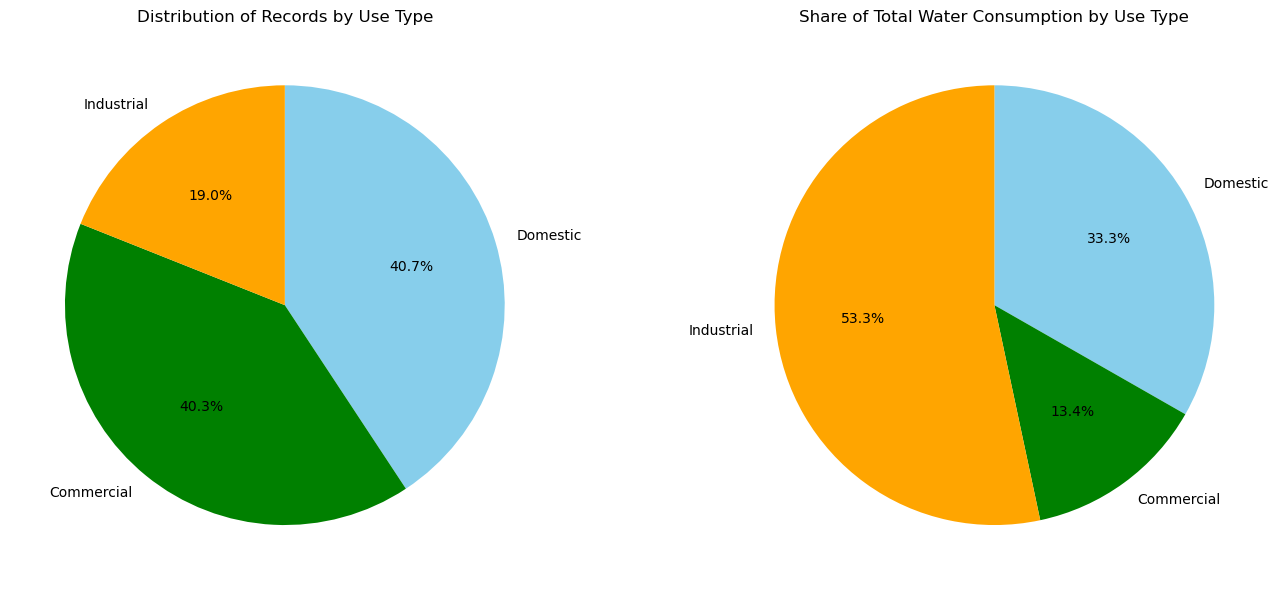

In [12]:
# Use pie chart distribution / distribution of consumption by use type

use_colors = {
    "Domestic": "skyblue",
    "Commercial": "green",
    "Industrial": "orange"
}

uses_order = ["Domestic", "Commercial", "Industrial"]
use_count = df["Use"].value_counts().reindex(uses_order)
use_share = df.groupby("Use")["Consumption_L_day"].sum().reindex(uses_order)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(
    use_count,
    labels=use_count.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=[use_colors[u] for u in use_count.index]
)
axes[0].set_title("Distribution of Records by Use Type")

axes[1].pie(
    use_share,
    labels=use_share.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False, 
    colors=[use_colors[u] for u in use_count.index]
)
axes[1].set_title("Share of Total Water Consumption by Use Type")

plt.tight_layout()
plt.show()

/var/folders/75/d19stbkx517flmxxrmxng2lc0000gn/T/ipykernel_15061/796179866.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(district_count.index, rotation=45, ha="right")
/var/folders/75/d19stbkx517flmxxrmxng2lc0000gn/T/ipykernel_15061/796179866.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(district_share.index, rotation=45, ha="right")


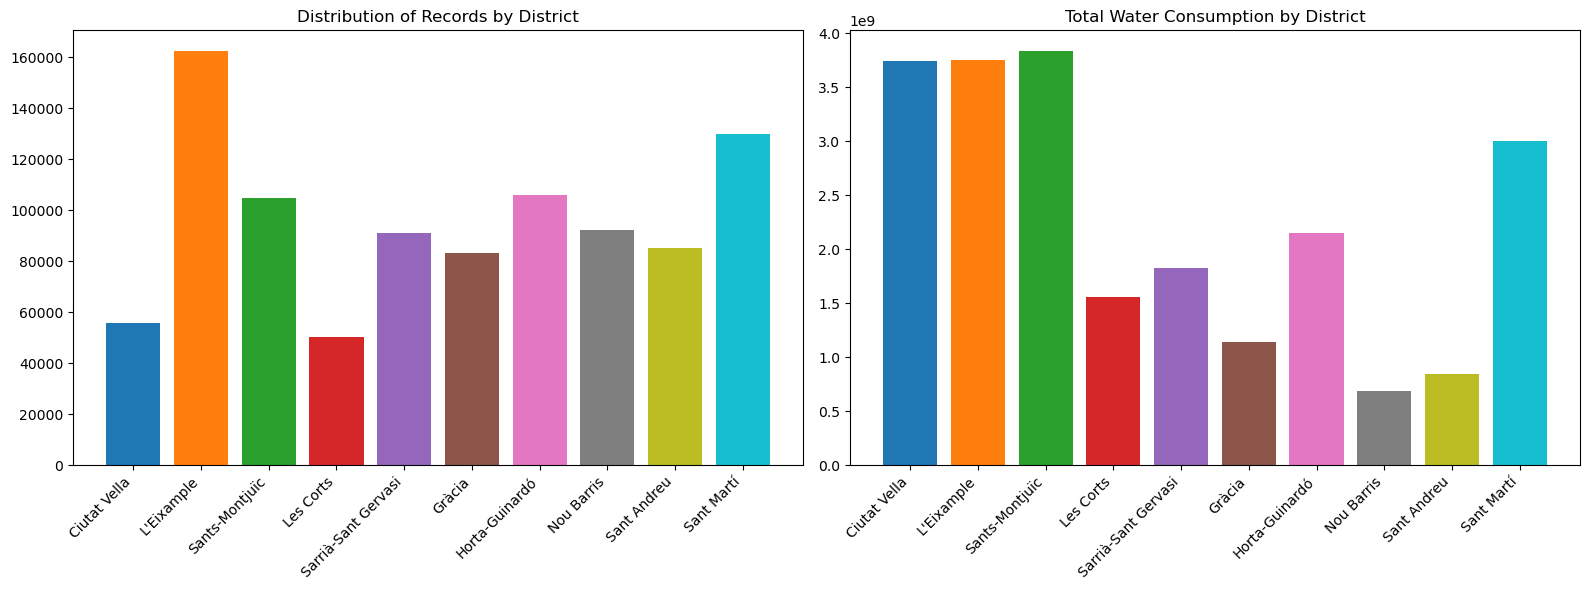

In [13]:
# District distribution
district_colors = {
    name: plt.cm.tab10(i)  # use matplotlib tab10 colormap
    for i, name in enumerate(district_map.values())
}

districts_order = list(district_map.values())

district_count = df["District_Name"].value_counts().reindex(districts_order)

district_share = df.groupby("District_Name")["Consumption_L_day"].sum().reindex(districts_order)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(
    district_count.index,
    district_count.values,
    color=[district_colors[d] for d in district_count.index]
)
axes[0].set_title("Distribution of Records by District")
axes[0].set_xticklabels(district_count.index, rotation=45, ha="right")

axes[1].bar(
    district_share.index,
    district_share.values,
    color=[district_colors[d] for d in district_share.index]
)
axes[1].set_title("Total Water Consumption by District")
axes[1].set_xticklabels(district_share.index, rotation=45, ha="right")

plt.tight_layout()
plt.show()

/var/folders/75/d19stbkx517flmxxrmxng2lc0000gn/T/ipykernel_15061/4001517098.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=district_avg.index, y=district_avg.values, palette=district_colors)


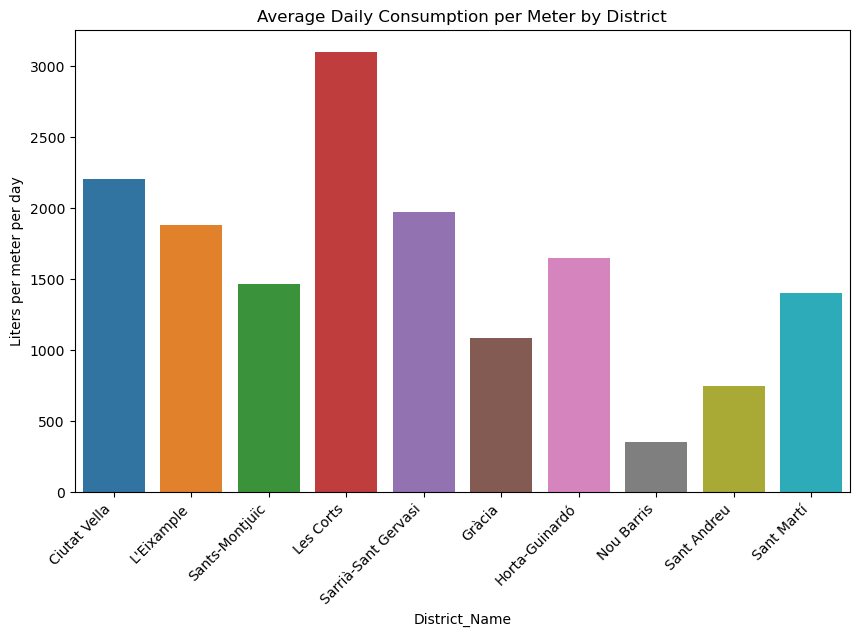

In [17]:
df["Consumption_per_meter"] = df["Consumption_L_day"] / df["NumMeters"]
district_avg = df.groupby("District_Name")["Consumption_per_meter"].mean().reindex(districts_order)

plt.figure(figsize=(10,6))
sns.barplot(x=district_avg.index, y=district_avg.values, palette=district_colors)
plt.title("Average Daily Consumption per Meter by District")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Liters per meter per day")
plt.show()


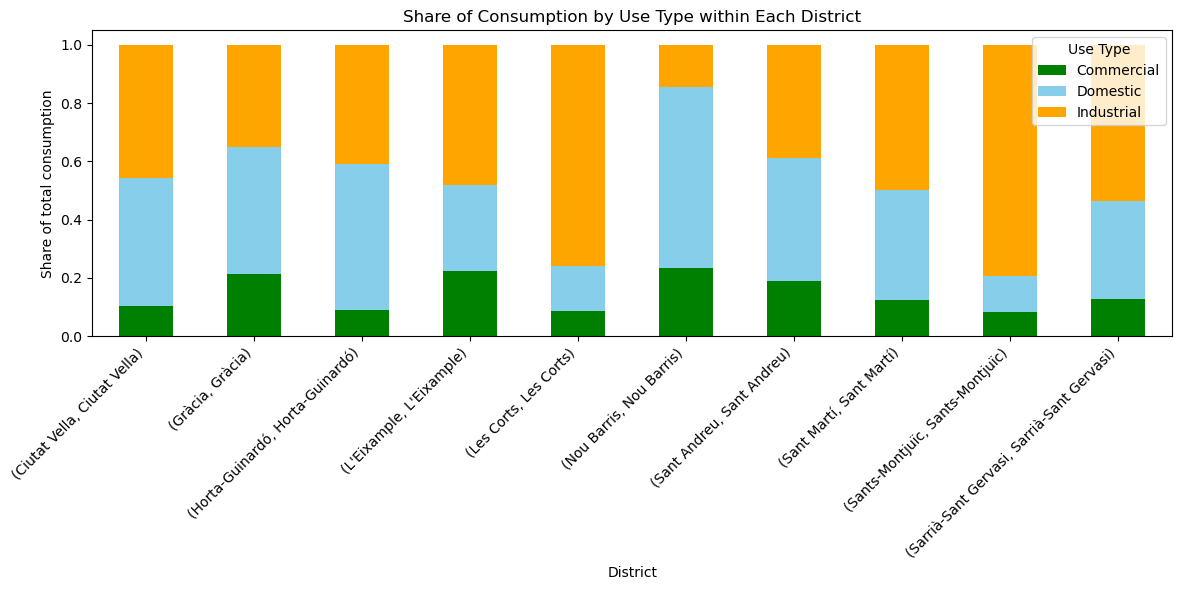

In [21]:
use_district_share = (
    df.groupby(["District_Name", "Use"])["Consumption_L_day"].sum()
      .groupby(level=0).apply(lambda x: x / x.sum())
      .unstack()
)

use_district_share.plot(kind="bar", stacked=True, figsize=(12,6), color=use_colors)
plt.title("Share of Consumption by Use Type within Each District")
plt.xticks(rotation=45, ha="right")
plt.xlabel("District")
plt.ylabel("Share of total consumption")
plt.legend(title="Use Type")
plt.tight_layout()
plt.show()


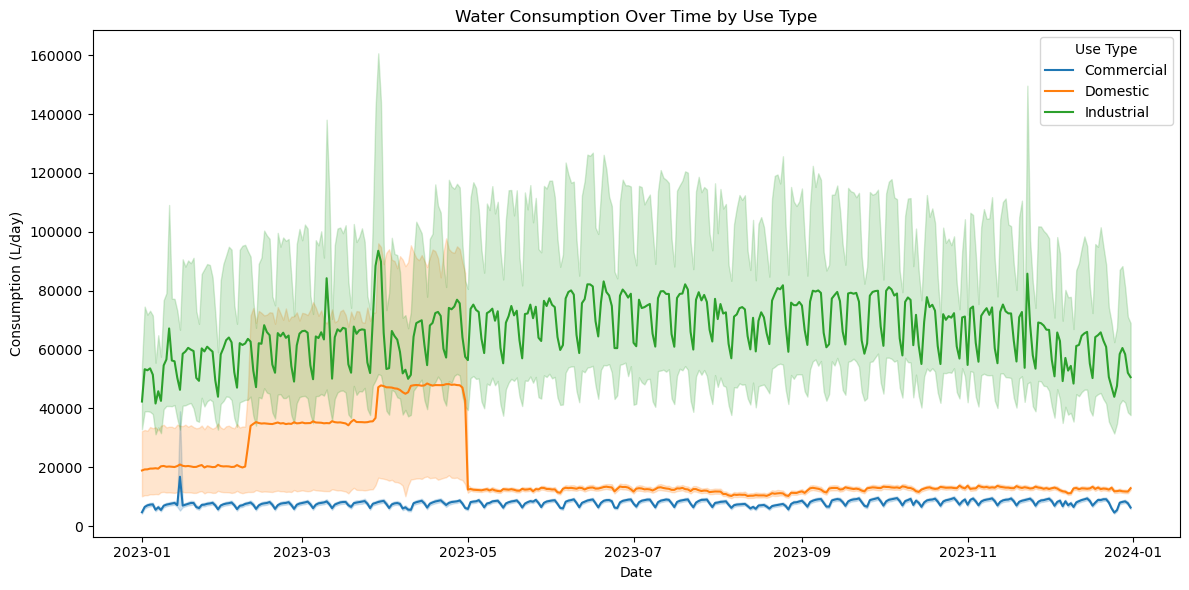

In [14]:
# Consumption over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Consumption_L_day", hue="Use")
plt.title("Water Consumption Over Time by Use Type")
plt.xlabel("Date")
plt.ylabel("Consumption (L/day)")
plt.legend(title="Use Type")
plt.tight_layout()
plt.show()

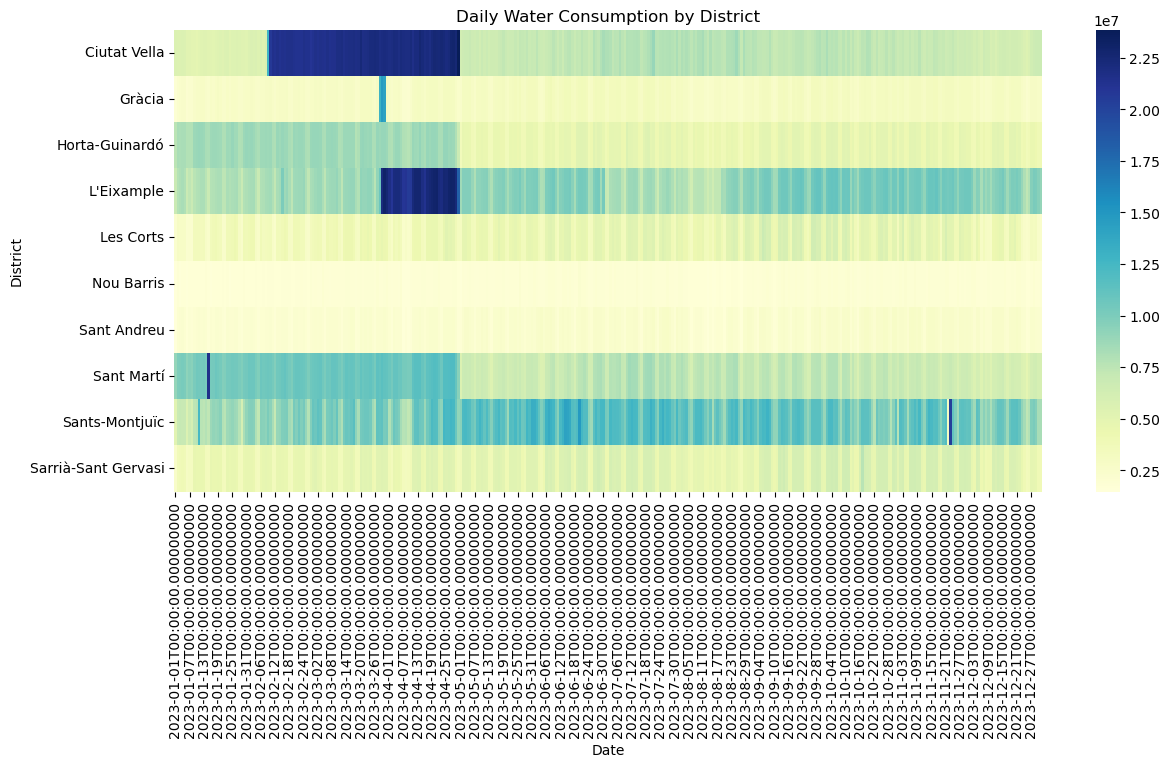

In [18]:
pivot = df.pivot_table(index="District_Name", columns="Date", values="Consumption_L_day", aggfunc="sum")
plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Daily Water Consumption by District")
plt.xlabel("Date")
plt.ylabel("District")
plt.show()


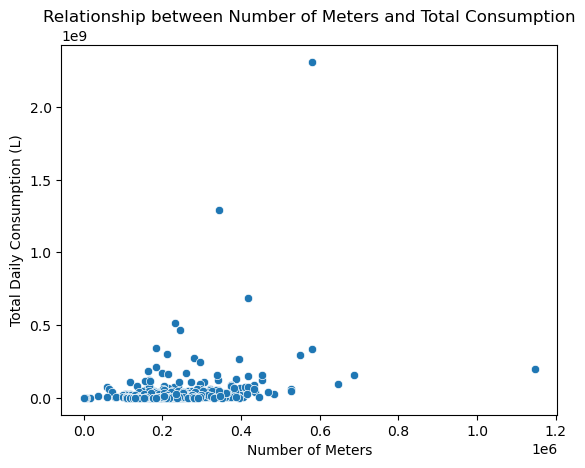

,NumMeters,Consumption_L_day
NumMeters,1.000000,0.008538
Consumption_L_day,0.008538,1.000000


In [23]:
agg = df.groupby("CensusSection")[["NumMeters", "Consumption_L_day"]].sum().reset_index()
sns.scatterplot(data=agg, x="NumMeters", y="Consumption_L_day")
plt.title("Relationship between Number of Meters and Total Consumption")
plt.xlabel("Number of Meters")
plt.ylabel("Total Daily Consumption (L)")
plt.show()

df[["NumMeters", "Consumption_L_day"]].corr()